# GWInSpect

This notebook 

### Module - spectrum

In [ ]:
from gwinspect.spectrum import compute_omega_gw
import matplotlib.pyplot as plt

To compute the spectral energy density of inflationary first-order gravitational waves (GWs), we use the function ```compute_omega_gw```.  
In this function the pre-hot Big Bang phase is modelled by 'n' number of multiple epochs with different constant equations of state.

- $w_i$ : Equation of state of $i^{\rm th}$ epoch during pre-hot Big Bang phase.
- $E_i$ : Energy scale of the universe [in GeV] at the moment of transition from $i^{\rm th}$ epoch to $(i+1)^{\rm th}$ epoch during pre-hot Big Bang phase.
- $r$ : Tensor-to-scalar ratio.
- $E_{\rm inf}$ : Energy scale of the universe [in GeV] corresponding to the end of inflation.
- $E_{\rm r*}$ : Energy scale of the universe [in GeV] corresponding to the end of pre-hot Big Bang phase.
- $T_{\rm r*}$ : Temperature scale of the universe [in GeV] corresponding to the end of pre-hot Big Bang phase.

The mandatory arguements in ```compute_omega_gw``` are:
> * ```eos_list``` : list  
        Equation-of-state values $[w_1, ..., w_n]$ for pre-hot Big Bang epochs. Each $w \in [-0.28, 1)$.
> * ```energy_list``` : list  
        List of energies $[E_{n-1}, ..., E_2, E_1]$ (in GeV), provided from latest to earliest pre-hot Big Bang epoch.  
        This list does not include the energy scale at the end of pre-hot Big Bang ($E_{\rm r*}$).  
        If pre-hot Big Bang has n epochs, energy_list must have length n-1.  
        For single equation-of-state epoch (n=1), provide an empty list [].  
> * ```E_rstar```, ```T_rstar``` : float  
        ```E_rstar``` = $E_{\rm r*}$ [GeV]  
        ```T_rstar``` = $T_{\rm r*}$ [GeV]  
        You must specify exactly one of these. If both are provided, T_rstar is used.  
> * ```r```, ```E_inf``` : float  
        ```r``` = Tensor-to-scalar ratio, $r$  
        ```E_inf``` = $E_{\rm inf}$ [GeV]  
        You must specify exactly one of these. If both are provided, r is used.  

The typical output of ```compute_omega_gw``` is a tuple consisting of (```f_arr```, ```omega_gw_arr```)   
- ```f_arr``` : numpy array with present-day frequency of GWs from ```f_min``` = $2 \times 10^{-20}$ Hz to ```f_max``` = ```f_inf```, (compuated internally in the code) which corresponds to the tensor mode that re-entered the Hubble radius at the time of end of inflation. The number of points are set to default value ```num_of_points``` = 1000 in Log space.
- ```omega_gw_arr``` : numpy array of $\Omega_{\rm GW} (f)$ for frequencies in ```f_arr```.


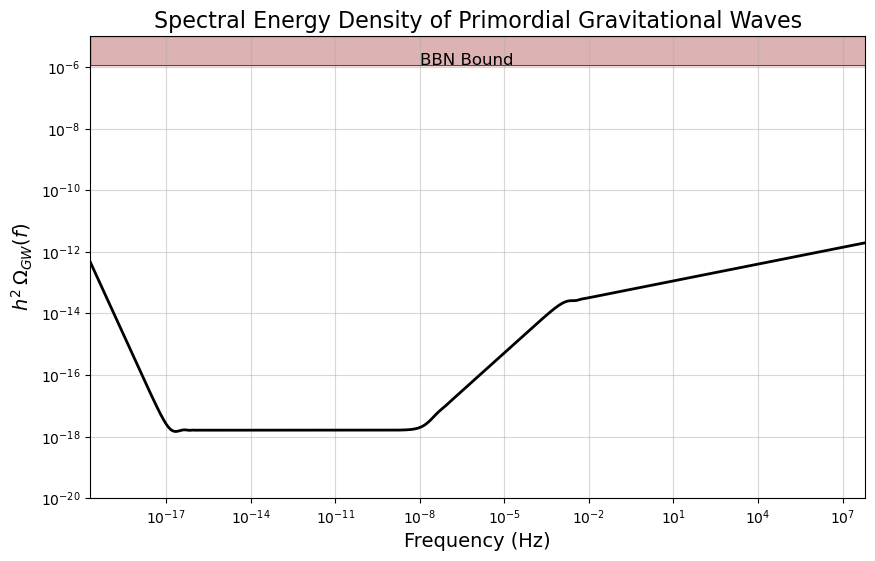

In [ ]:
eos_list = [0.4, 0.8] # equation of state parameters
E_rstar = 1 # in GeV units, energy at the end of pre-hot Big Bang phase
energy_list = [1e5] # in GeV units, end energy at the transition from first to second epoch during pre-hot Big Bang phase
r = 0.001 # tensor-to-scalar ratio

f_arr, omega_gw_arr = compute_omega_gw(eos_list=eos_list, E_rstar=E_rstar, energy_list=energy_list, r=r)

bbn_bound = 1.13e-6 # BBN bound on Omega_gw h^2

plt.figure(figsize=(10,6))
plt.loglog(f_arr, omega_gw_arr, lw=2, color = 'black')
plt.xlabel(r'Frequency (Hz)', fontsize=14)
plt.ylabel(r'$h^2 \, \Omega_{GW}(f)$', fontsize=14)
plt.title('Spectral Energy Density of Primordial Gravitational Waves', fontsize=16)
plt.grid(True, alpha=0.5)
plt.xlim(f_arr[0], f_arr[-1])
plt.ylim(1e-20, 1e-5)
plt.axhline(y=bbn_bound, color='darkred', linestyle='-', lw=0.5)
plt.text(1e-8, bbn_bound, 'BBN Bound', color='k', fontsize=12)
plt.fill_between(f_arr, bbn_bound, 1e-5, color='darkred', alpha=0.3)
plt.show()

* If one needs the transition frequencies corresponding to the boundaries of each epoch in the pre-hot Big Bang phase, set ```show_freqs``` = ```True``` in ```compute_omega_gw```.  
This will return (```f_arr```, ```omega_gw_arr```, ```freq_boundaries```)  
```freq_boundaries``` : List consisting of $[f_0 = f_{\rm inf}, f_1, ... , f_n = f_{\rm r*}]$ in Hz

* If one needs the number of $e$-folds during each epoch in the pre-hot Big Bang phase, set ```show_efolds``` = ```True``` in ```compute_omega_gw```.  
This will return (```f_arr```, ```omega_gw_arr```, ```efold_list```)  
```efold_list``` : List consisting of $[N_{e1}, N_{e2}, ... , N_{en}]$

* If both ```show_freqs``` = ```True``` and ```show_efolds``` = ```True```
This will return (```f_arr```, ```omega_gw_arr```, ```freq_boundaries```, ```efold_list```)  

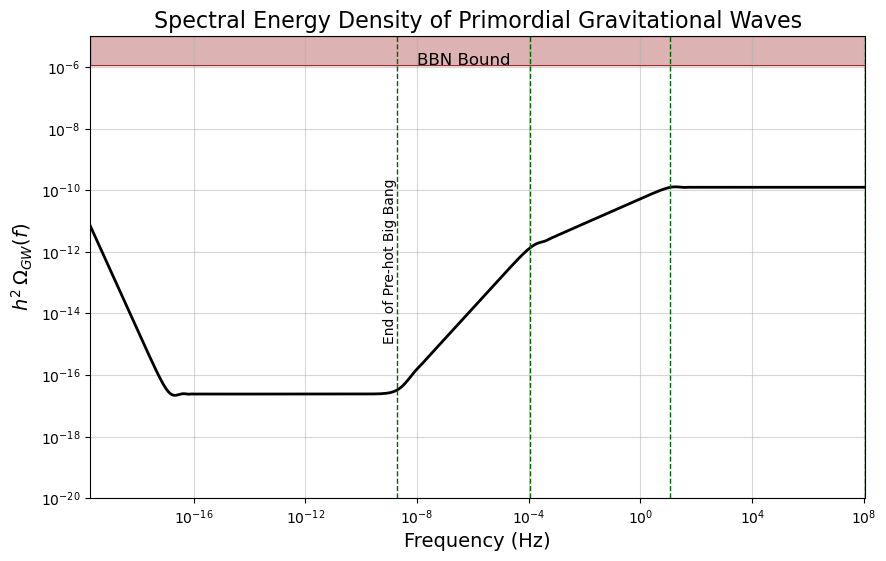

Transition Frequencies (Hz): [110672831.18076916, 11.067283118076917, 0.00011067283118076916, 1.9716974479963425e-09]
E-fold Values: [16.11809565095832, 10.23371152441798, 7.431517275546754]


In [8]:
eos_list = [1/3, 0.5, 0.99] # equation of state parameters
T_rstar = 0.1 # in GeV units, temperature at the end of pre-hot Big Bang phase
energy_list = [1e4, 1e9] # in GeV units, end energy at the transition from first to second epoch during pre-hot Big Bang phase
E_inf = 1e16 # in GeV units, energy scale during inflation

f_arr, omega_gw_arr, freq_boundaries, efold_list = compute_omega_gw(eos_list=eos_list, T_rstar=T_rstar,
                                                                       energy_list=energy_list, E_inf=E_inf, show_efolds=True, show_freqs=True)

bbn_bound = 1.13e-6 # BBN bound on Omega_gw h^2

plt.figure(figsize=(10,6))
plt.loglog(f_arr, omega_gw_arr, lw=2, color = 'black')
for fb in freq_boundaries:
    plt.axvline(x=fb, color='darkgreen', linestyle='--', lw=1)
plt.xlabel('Frequency (Hz)', fontsize=14)
plt.ylabel(r'$h^2 \, \Omega_{GW}(f)$', fontsize=14)
plt.title('Spectral Energy Density of Primordial Gravitational Waves', fontsize=16)
plt.grid(True, alpha=0.5)
plt.xlim(f_arr[0], f_arr[-1])
plt.ylim(1e-20, 1e-5)
plt.axhline(y=bbn_bound, color='darkred', linestyle='-', lw=0.5)
plt.text(1e-8, bbn_bound, 'BBN Bound', color='k', fontsize=12)
plt.text(freq_boundaries[-1], 1e-15, "End of Pre-hot Big Bang", rotation=90, color='black', fontsize=10, va='bottom', 
         ha='right')
plt.fill_between(f_arr, bbn_bound, 1e-5, color='darkred', alpha=0.3)
plt.show()
print("Transition Frequencies (Hz):", freq_boundaries)
print("E-fold Values:", efold_list)

If one needs to compute $\Omega_{\rm GW}$ for a desired range $<= f_{\rm inf}$, use the optional arguements ```f_min``` and ```f_max```.  
* Changing the default value of ```f_min``` = $2 \times 10^{-20}$ Hz to a lower value will print a warning, since those frequencies may correspond to super-Hubble modes today.
* If ```f_max``` $>$ ```f_inf```, a ValueError is raised.
* ```f_arr``` will have 1000 points in log space from ```f_min``` to ```f-max```. Accordingly their $\Omega_{\rm GW}$ value id returned in ```omega_gw_arr```.

This feature id useful is the user needs to compute $\Omega_{\rm GW}$ for a certain short range. Also, reducing the value of number of points in ```num_of_points``` along with this for a shorter range will save compuatational time.

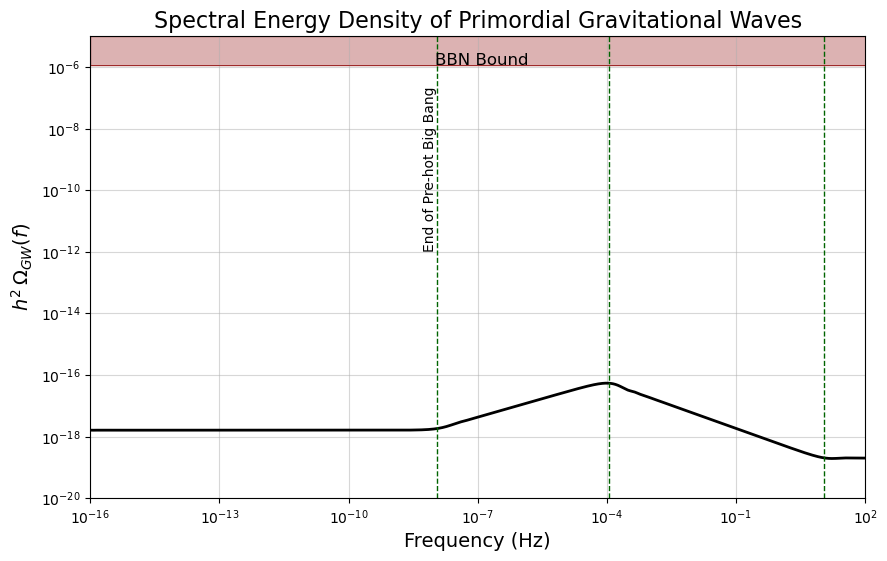

Transition Frequencies (Hz): [63765155.210828684, 11067.283118076915, 11.067283118076917, 0.00011067283118076916, 1.142861559301756e-08]
E-fold Values: [6.076469385558831, 6.907755278982137, 12.792139405522477, 8.186969219534385]


In [10]:
eos_list = [0.9, 1/3, 0.2, 0.5] # equation of state parameters
E_rstar = 1 # in GeV units, temperature at the end of pre-hot Big Bang phase
energy_list = [1e4, 1e9, 1e12] # in GeV units, end energy at the transition of epochs during pre-hot Big Bang phase
r = 1e-3
f_min = 1e-16 # in Hz units, minimum frequency to compute Omega_gw
f_max = 1e2 # in Hz units, maximum frequency to compute Omega_gw

f_arr, omega_gw_arr, freq_boundaries, efold_list = compute_omega_gw(eos_list=eos_list, E_rstar=E_rstar,
                                                                       energy_list=energy_list, r=r, show_efolds=True, show_freqs=True, f_min=f_min, f_max=f_max)

bbn_bound = 1.13e-6 # BBN bound on Omega_gw h^2

plt.figure(figsize=(10,6))
plt.loglog(f_arr, omega_gw_arr, lw=2, color = 'black')
for fb in freq_boundaries:
    plt.axvline(x=fb, color='darkgreen', linestyle='--', lw=1)
plt.xlabel('Frequency (Hz)', fontsize=14)
plt.ylabel(r'$h^2 \, \Omega_{GW}(f)$', fontsize=14)
plt.title('Spectral Energy Density of Primordial Gravitational Waves', fontsize=16)
plt.grid(True, alpha=0.5)

plt.xlim(f_arr[0], f_arr[-1])

plt.ylim(1e-20, 1e-5)
plt.axhline(y=bbn_bound, color='darkred', linestyle='-', lw=0.5)
plt.text(1e-8, bbn_bound, 'BBN Bound', color='k', fontsize=12)
plt.text(freq_boundaries[-1], 1e-12, "End of Pre-hot Big Bang", rotation=90, color='black', fontsize=10, va='bottom', ha='right')
plt.fill_between(f_arr, bbn_bound, 1e-5, color='darkred', alpha=0.3)
plt.show()
print("Transition Frequencies (Hz):", freq_boundaries)
print("E-fold Values:", efold_list)

If one like to compute the spectrum for selected frequencies (not a range), they can use the optional arguement ```f_custom```. It accepts numpy arrays or list.  
Even if the interested frequency is just one value, it needs to be given as an array or a list. The output in ```f_arr``` and ```omega_gw_arr``` will be a numpy array of single element.

In [11]:
eos_list = [1/3, 0.5, 0.99] # equation of state parameters
T_rstar = 0.1 # in GeV units, temperature at the end of pre-hot Big Bang phase
energy_list = [1e4, 1e9] # in GeV units, end energy at the transition from first to second epoch during pre-hot Big Bang phase
E_inf = 1e16 # in GeV units, energy scale during inflation
f_custom = [1e-7, 1e0, 1e4]  # Custom frequencies to highlight

f_arr, omega_gw_arr, freq_boundaries, efold_list = compute_omega_gw(eos_list=eos_list, T_rstar=T_rstar,
                                                                       energy_list=energy_list, E_inf=E_inf, show_efolds=True, show_freqs=True, f_custom=f_custom)

print(f"Custom Frequencies (Hz): {f_custom}")
print(f"Spectral energy density at Custom Frequencies: {omega_gw_arr}")
print("")
print("Transition Frequencies (Hz):", freq_boundaries)
print("E-fold Values:", efold_list)

Custom Frequencies (Hz): [1e-07, 1.0, 10000.0]
Spectral energy density at Custom Frequencies: [1.49816475e-15 5.24601594e-11 1.23701430e-10]

Transition Frequencies (Hz): [110672831.18076916, 11.067283118076917, 0.00011067283118076916, 1.9716974479963425e-09]
E-fold Values: [16.11809565095832, 10.23371152441798, 7.431517275546754]


### Module - constraints

In [1]:
from gwinspect.constraints import check_bbn
from gwinspect.spectrum import compute_omega_gw
import matplotlib.pyplot as plt

To check whether the BBN constraint for gravitational waves is satisfied or not, we have introduced an equation obtained using piecewise integration of the analytical BBN constraint equation (the full expression is available in our paper).  
In this package one can check whether the multi-epoch pre-hot Big Bang phase specified by the user satisfies the BBN constraint or not using the function ```check_bbn```.  
It takes the same input parameters as ```compute_omega_gw``` in specifying the mutiple epochs.  
The function will return a tuple with (```bbn_integral```, ```is_satisfied```):
* ```bbn_integral``` : The value of the piecewise integral of $h^ \Omega_{\rm GW}$ from $f_{\rm BBN} $ to $f_{\rm inf}$ in log space.
* ```is_satisfied``` : return ```True``` if ```bbn_integral``` $< 1.13e-6$, the BBN bound. Else return ```False```.

One can also change the value of BBN bound using the optional arguement ```bbn_bound``` whose default value is $1.13e-6$.  
The optional arguement ```tol``` can also be changed from its default value $1e-12$. This is used for checking whether to perform Logarithm limit or not in the piecewise integral expression for numerical stability when $w \rightarrow 1/3$. Logarith limit is used when $|(2/(1+3w)) - 1| <$ ```tol```.

In [4]:
eos_list = [1/3, 0.5, 0.99] # equation of state parameters
T_rstar = 0.1 # in GeV units, temperature at the end of pre-hot Big Bang phase
energy_list = [1e4, 1e9] # in GeV units, end energy at the transition from first to second epoch during pre-hot Big Bang phase
E_inf = 1e16 # in GeV units, energy scale during inflation

bbn_integral, is_satisfied = check_bbn(eos_list=eos_list, T_rstar=T_rstar,
                                      energy_list=energy_list, E_inf=E_inf)

print(f"BBN Integral Value: {bbn_integral}")
if is_satisfied:
    print(f"Is BBN Constraint Satisfied? {is_satisfied}: {bbn_integral} < 1.13e-6")
else:
    print(f"Is BBN Constraint Satisfied? {is_satisfied}: {bbn_integral} >= 1.13e-6")

BBN Integral Value: 3.1756407862347264e-09
Is BBN Constraint Satisfied? True: 3.1756407862347264e-09 < 1.13e-6


An example where BBN constraint is violated.

BBN Integral Value: 1.076047819747521e-05
Is BBN Constraint Satisfied? False: 1.076047819747521e-05 >= 1.13e-6


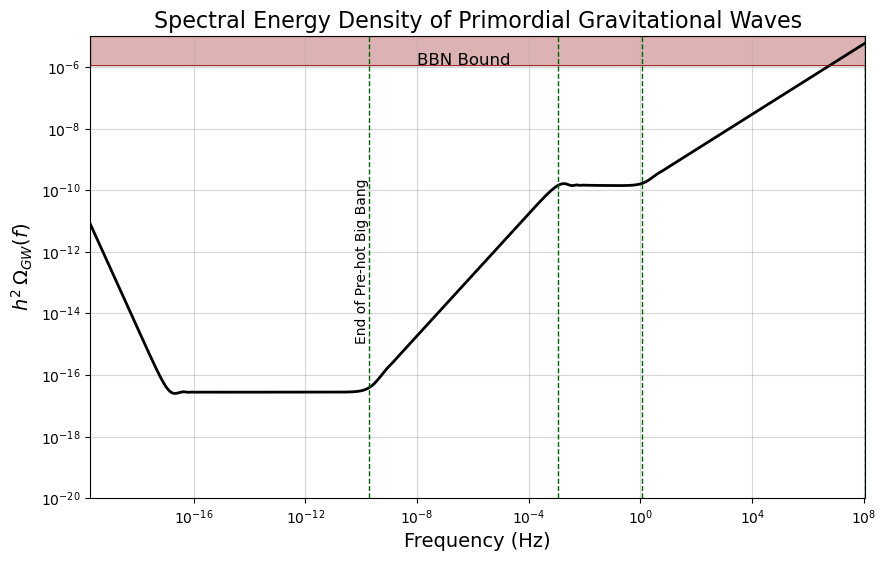

In [10]:
eos_list = [0.6, 0.33, 0.99] # equation of state parameters
T_rstar = 0.01 # in GeV units, temperature at the end of pre-hot Big Bang phase
energy_list = [1e5, 1e8] # in GeV units, end energy at the transition from first to second epoch during pre-hot Big Bang phase
E_inf = 1e16 # in GeV units, energy scale during inflation

bbn_integral, is_satisfied = check_bbn(eos_list=eos_list, T_rstar=T_rstar,
                                      energy_list=energy_list, E_inf=E_inf)

print(f"BBN Integral Value: {bbn_integral}")
if is_satisfied:
    print(f"Is BBN Constraint Satisfied? {is_satisfied}: {bbn_integral} < 1.13e-6")
else:
    print(f"Is BBN Constraint Satisfied? {is_satisfied}: {bbn_integral} >= 1.13e-6")

f_arr, omega_gw_arr, freq_boundaries, efold_list = compute_omega_gw(eos_list=eos_list, T_rstar=T_rstar,
                                                                       energy_list=energy_list, E_inf=E_inf, show_efolds=True, show_freqs=True)

bbn_bound = 1.13e-6 # BBN bound on Omega_gw h^2

plt.figure(figsize=(10,6))
plt.loglog(f_arr, omega_gw_arr, lw=2, color = 'black')
for fb in freq_boundaries:
    plt.axvline(x=fb, color='darkgreen', linestyle='--', lw=1)
plt.xlabel('Frequency (Hz)', fontsize=14)
plt.ylabel(r'$h^2 \, \Omega_{GW}(f)$', fontsize=14)
plt.title('Spectral Energy Density of Primordial Gravitational Waves', fontsize=16)
plt.grid(True, alpha=0.5)
plt.xlim(f_arr[0], f_arr[-1])
plt.ylim(1e-20, 1e-5)
plt.axhline(y=bbn_bound, color='darkred', linestyle='-', lw=0.5)
plt.text(1e-8, bbn_bound, 'BBN Bound', color='k', fontsize=12)
plt.text(freq_boundaries[-1], 1e-15, "End of Pre-hot Big Bang", rotation=90, color='black', fontsize=10, va='bottom', 
         ha='right')
plt.fill_between(f_arr, bbn_bound, 1e-5, color='darkred', alpha=0.3)
plt.show()

### Module - cosmo_tools

In [1]:
from gwinspect.cosmo_tools import energy_of_T, temp_of_E, freq_of_T, get_efolds

* The conversion between (*effective*) temperature scale and energy scale of the Universe can be performed using:
> * ```energy_of_T```: convert temperature in GeV to energy scale in GeV
> * ```temp_of_E```: convert energy scale in GeV to temperature in GeV

In [ ]:
T1 = 1e3  # Temperature in GeV
E1 = energy_of_T(T1)
print(f"Energy corresponding to T = {T1} GeV is E={E1} GeV")

T2 = temp_of_E(E1)
print(f"Temperature corresponding to E = {E1} GeV is T = {T2} GeV")

Energy corresponding to T=1000.0 GeV is E=2434.3700349983387 GeV
Temperature corresponding to E=2434.3700349983387 GeV is T=1000.0 GeV


These functions are also vectorised to accepet more than one element

In [20]:

temp_list = [1e-2, 1, 1e2, 1e4]  # List of temperatures in GeV
energy_list = energy_of_T(temp_list)
new_temp_list = temp_of_E(energy_list)

# check temp_list == new_temp_list
print(f'original equal to new: {temp_list == new_temp_list}')

original equal to new: [ True  True  True  True]


* The present-day frequency [Hz] of the gravitational waves (GWs) that had re-entered the Hubble radius during the time when the *effective* temperature scale of the Universe was $T$ [GeV] can be obtained using the function ```freq_of_T```

In [13]:
T3 = 1e-3 # Temperature in GeV
f3 = freq_of_T(T3)
print(f"Present-day frequency of GWs corresponding to T = {T3} GeV is f = {f3} Hz")

Present-day frequency of GWs corresponding to T = 0.001 GeV is f = 1.836529370400205e-11 Hz


This function is also vectorised

In [14]:
freq_list = freq_of_T(temp_list)
print(f"Present-day frequencies of GWs corresponding to temperatures {temp_list} GeV are {freq_list} Hz")

Present-day frequencies of GWs corresponding to temperatures [0.01, 1, 100.0, 10000.0] GeV are [1.83767078e-10 2.54697957e-08 2.69418624e-06 2.69418624e-04] Hz


* The number of *e*-folds extended during an epoch with constant equation of state parameter $w$ and the energy scales marking the beginning and end of the epoch being $E_i$ and $E_f$, respectively, can be obtained using ```get_efolds```

In [ ]:
w = 0.8 # Equation of state parameter
Ei = 1e6  # Initial energy scale in GeV
Ef = 1e4  # Final energy scale in GeV
N_efolds = get_efolds(w = w, Ei = Ei, Ef = Ef)
print(f"Number of e-folds from E = {Ei} GeV to E = {Ef} GeV with w = {w} is N = {N_efolds}")

Number of e-folds from E = 1000000.0 GeV to E = 10000.0 GeV with w = 0.8 is N = 3.4112371748059935


## Additional configurations

### Module - thermo

This module loads the data for the relativistic degrees of freedom in energy density, ```g_star(T)```, and entropy density, ```g_s(T)```.

In [2]:
from gwinspect.thermo import g_star, g_s, load_eff_rel_dof
from gwinspect import thermo
import numpy as np
import matplotlib.pyplot as plt

The users can call the function ```g_star(T)``` and ```g_s(T)``` to get the approxmiate values for the relativistic degrees of freedom in energy density and entropy density respectively. These functions returns values based on the data in the file ```gwinspect/data/eff_rel_dof.txt```, which consists of three columns (temperature [GeV], g_star, g_s).

In [9]:
g_star_100GeV = g_star(100)
g_s_100GeV = g_s(100)
g_star_bbn = g_star(1e-3)
g_s_bbn = g_s(1e-3)
print(f"g_star at 100 GeV: {g_star_100GeV}")
print(f"g_s at 100 GeV: {g_s_100GeV}")
print(f"g_star at BBN: {g_star_bbn}")
print(f"g_s at BBN: {g_s_bbn}")

g_star at 100 GeV: 106.75
g_s at 100 GeV: 106.75
g_star at BBN: 10.71
g_s at BBN: 10.71


The entire data in ```eff_rel_dof.txt``` can be loaded using the function ```load_eff_rel_dof()```, which gives a tuple of three numpy arrays, (temperature [GeV], g_star, g_s) in order.

In [4]:
table = load_eff_rel_dof()
print(table)

(array([1.000e+05, 1.000e+04, 1.000e+03, 1.000e+02, 5.000e+01, 3.200e+01,
       3.100e+01, 3.000e+01, 2.950e+01, 2.925e+01, 2.900e+01, 2.883e+01,
       2.783e+01, 2.683e+01, 2.583e+01, 2.483e+01, 2.383e+01, 2.283e+01,
       2.173e+01, 2.143e+01, 2.125e+01, 2.095e+01, 2.085e+01, 1.985e+01,
       1.885e+01, 1.785e+01, 1.685e+01, 1.650e+01, 1.600e+01, 1.550e+01,
       1.520e+01, 1.500e+01, 1.480e+01, 1.460e+01, 1.420e+01, 1.380e+01,
       1.360e+01, 1.350e+01, 1.340e+01, 1.320e+01, 1.300e+01, 1.280e+01,
       1.220e+01, 1.180e+01, 1.080e+01, 9.000e+00, 7.000e+00, 4.800e+00,
       2.600e+00, 1.400e+00, 1.200e+00, 1.000e+00, 9.000e-01, 8.500e-01,
       8.000e-01, 7.500e-01, 7.000e-01, 6.900e-01, 6.500e-01, 6.000e-01,
       5.500e-01, 5.000e-01, 4.000e-01, 3.500e-01, 3.200e-01, 3.000e-01,
       2.970e-01, 2.900e-01, 2.850e-01, 2.750e-01, 2.650e-01, 2.550e-01,
       2.450e-01, 2.400e-01, 2.350e-01, 2.300e-01, 2.150e-01, 2.130e-01,
       1.600e-01, 1.570e-01, 1.550e-01, 1.530e-01,

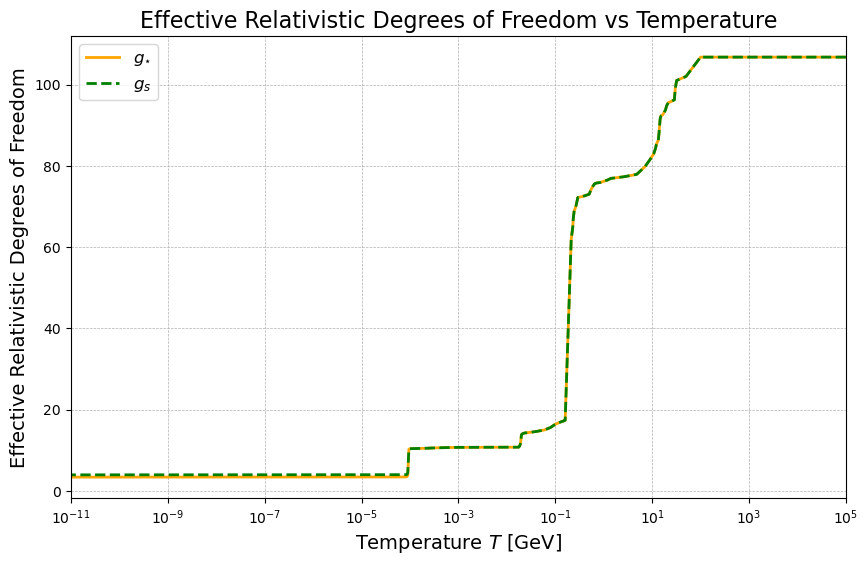

In [5]:
Temp, gstar, gs = load_eff_rel_dof()
plt.figure(figsize=(10, 6))
plt.plot(Temp, gstar, label=r"$g_{\star}$", color='orange', lw=2, ls='-')
plt.plot(Temp, gs, label=r"$g_{s}$", color='green', lw=2, ls='--')
plt.xscale('log')
plt.xlabel(r'Temperature $T$ [GeV]', fontsize=14)
plt.ylabel(r'Effective Relativistic Degrees of Freedom', fontsize=14)
plt.title(r'Effective Relativistic Degrees of Freedom vs Temperature', fontsize=16)
plt.xlim(table[0].min(), table[0].max())
plt.legend(fontsize=12)
plt.grid(True, which="both", ls="--", lw=0.5)
plt.show()

The users can also replace the default ```eff_rel_dof.txt``` with their own data containing the temperature in GeV and the values of g_star(T) and g_s(T). In order to do that, use the function ```set_custom_eff_rel_dof()```. Note that it is advised to implement this in the following way:

```bash
custom_data_path = r"C:\Users\...\eff_rel_dof_custom.txt"
thermo.set_custom_eff_rel_dof(custom_data_path)
```
> Avoid calling the function as ```set_custom_eff_rel_dof(custom_data_path)``` instead of ```thermo.set_custom_eff_rel_dof(custom_data_path)```.

The custom data can be either a file path (to .txt or .csv) or a NumPy array/nested list. It must be of shape (N, 3), where columns are T [GeV], g_star(T), g_s(T).
Temperatures must be strictly positive, descending order preferred. This will update the effective relativistic degrees of freedom used for rest of the computations.


### Module - constants

In [6]:
import gwinspect.constants as const

This moudule contains some of the constant values used throughout in the package gwinspect. Their default values are as follows:

In [7]:
print("Using gwinspect constants:")
print(f"Reduced Planck mass m_P                         = {const.m_P} GeV")
print(f"Scalar amplitude A_S                            = {const.A_S} GeV")
print(f"CMB temperature today T0                       = {const.T0} GeV")
print(f"Radiation density parameter today Omega_rad0   = {const.Omega_rad0}")
print(f"BBN temperature T_bbn                           = {const.T_bbn} GeV")
print(f"Matter-radiation equality temperature T_eq      = {const.T_eq} GeV")

Using gwinspect constants:
Reduced Planck mass m_P                         = 2.44e+18 GeV
Scalar amplitude A_S                            = 2.1e-09 GeV
CMB temperature today T0                       = 2.35e-13 GeV
Radiation density parameter today Omega_rad0   = 4.16e-05
BBN temperature T_bbn                           = 0.001 GeV
Matter-radiation equality temperature T_eq      = 1e-09 GeV


The user can also globally redefine these values if they want for higer precision using the function ```set_constants(...)```.
> ⚠️ **Note:** Avoid using `from gwinspect.constants import m_P` — it creates a static copy and won't reflect updates made by `set_constants(...)`. Always use `import gwinspect.constants as const` to ensure values stay up to date.


In [8]:
const.set_constants(m_P=2.43e18, T0=2.351e-13)

print("\nAfter overriding m_P and T0:")
print(f"Reduced Planck mass m_P                         = {const.m_P} GeV")
print(f"CMB temperature today T0                       = {const.T0} GeV")



After overriding m_P and T0:
Reduced Planck mass m_P                         = 2.43e+18 GeV
CMB temperature today T0                       = 2.351e-13 GeV


> ℹ️ **Note:** Once you call `set_constants(...)`, the updated values persist for the entire notebook session.
> Even earlier cells will reflect the new values if re-run.
> To reset constants back to their defaults, you must **restart the kernel**.
